In [8]:
import math
import pygad
import numpy as np

In [28]:
gene_space = np.linspace(0, 0.99, 100)

def endurance(x, y, z, u, v, w):
    return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

def fitness_func(solution, solution_idx): 
    curr_max = 0
    if endurance(*solution) > curr_max:
        curr_max = endurance(*solution)
        return curr_max
    else:
        return 0


Parameters of the best solution : [0.67 0.61 0.99 0.99 0.01 0.07]
Fitness value of the best solution = 2.8303114689024733


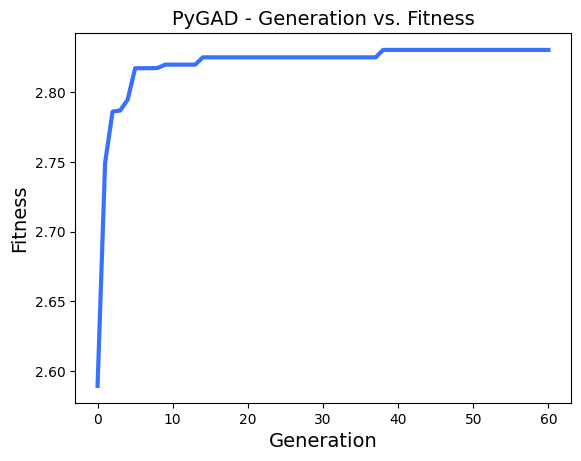

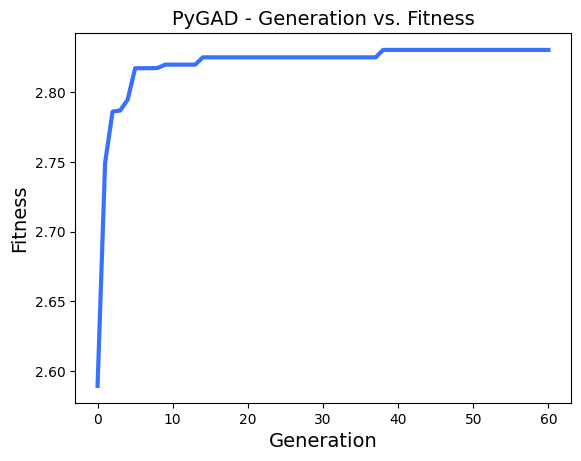

In [31]:
fitness_function = fitness_func
# max_pokolen - ok. 100

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 50
num_genes = 6 

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 25
num_generations = 60
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 15 

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()